In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime, timedelta
from numba import njit
from statsmodels.tsa.stattools import acf, adfuller, ccf, ccovf
from cycler import cycler
from scipy.signal import find_peaks
from ipywidgets import interact

In [6]:
from analysis_routines import *
from plotting_routines_xr import *
from harmonic_analysis import *
from wavelet_analysis import wavelet_power_spectrum
from processing_routines import datenum_to_epoch
plt.style.use('/home/manu/TFG_repo/notebooks/mplstyles/notebook.mplstyle')
from statsmodels.tsa.stattools import acf, adfuller, ccf, ccovf

## Notebook structure and content:
3 periods that exhibit clear tidal variability without strong influence of other processes are selected. For each of them, a spectrogram is computed via the multitapper method. Then the semi diurnal oscilation of D1 and G005 is explored visually applyng diferent filteres to the signal. A single semi-diurnal oscillation is selected and 4 vertical profiles in this interval are ploted. 

In [4]:
fit_chain = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
data_chain = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')
G005 = pd.read_csv(data_dir / 'SHDR_fit/aux/G05.csv', index_col='date', parse_dates=True)
delta005 = pd.read_csv(data_dir / 'SHDR_fit/aux/delta05_ci.csv', index_col='date', parse_dates=True)
bot_pres = pd.read_csv(data_dir / 'time_series/pressure_sensor/20181116_DanoisMoat.csv', 
                       index_col='date', parse_dates=True)


In [5]:
D1_ = fit_chain.D1
G005_ = G005.x

D1_filt512 = lowpass_filter(fit_chain.D1, data_chain.date, 1/5, 1/512)
G005_filt512 = lowpass_filter(G005.x, data_chain.date, 1/5, 1/512)

D1_filt1024 = lowpass_filter(fit_chain.D1, data_chain.date, 1/5, 1/1024)
G005_filt1024 = lowpass_filter(G005.x, data_chain.date, 1/5, 1/1024)

low = period_to_freq(14, 'h')
high = period_to_freq(8, 'h')
D1_bandpass_M2 = bandpass_filter(fit_chain.D1, data_chain.date, 1/5, low, high)
G005_bandpass_M2 = bandpass_filter(G005.x, data_chain.date, 1/5, low, high)

D1_dn = detrend_normalize(D1_bandpass_M2)
G005_dn = detrend_normalize(G005_bandpass_M2)

hi = period_to_freq(6, 'h')
G005_filt6h = lowpass_filter(G005.x, data_chain.date, 1/5, hi)
D1_filt6h = lowpass_filter(fit_chain.D1, data_chain.date, 1/5, hi)

In [6]:
# dates defining_periods
date_0 = datetime(2018, 11, 16, 11) # period_1
date_1 = datetime(2018, 11, 24)
period_1 = [date_0, date_1]

date_2 = datetime(2018, 11, 30) # period_2
date_3 = datetime(2018, 12, 9)
period_2 = [date_2, date_3]

date_4 = datetime(2019, 1, 5) # period_3
date_5 = datetime(2019, 1, 14)
period_3 = [date_4, date_5]

In [7]:
coriolis_frequency = 2*7.2921e-5*np.sin(np.deg2rad(data_chain.lat.data)[0])
coriolis_freq_cps = coriolis_frequency/2/np.pi
coriolis_freq_cpd = coriolis_freq_cps*60*60*24
M2_cpd = 1/12.42061*24
M4_cpd = 1/6.210301*24
K1_cpd = 1/23.934470*24
Q1_cpd = 1/28.006223*24
M3_cpd = 1/8.280401*24
M8_cpd = 1/3.105150*24
O1_cpd = 1/1/25.819351*24 # not present in temperature record
Q1_2_cpd = 1/28.006223*24
M6_cpd = 1/4.14020*24

## Period_1

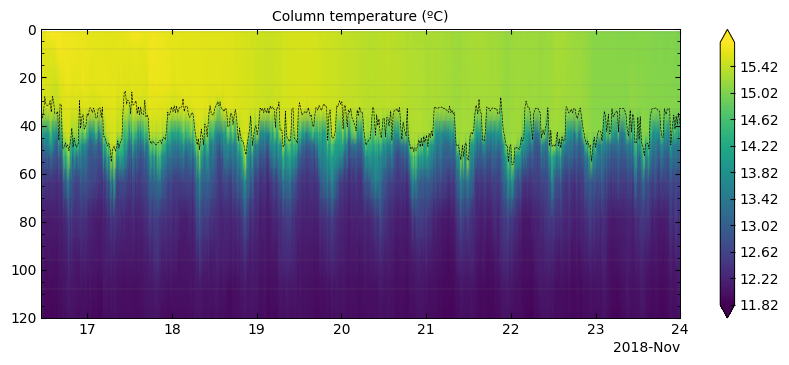

In [15]:
plot_column_temperature(data_chain, fit_chain, period=period_1, ylims=[120, 0])

In [45]:
p1D_freqs, p1D_psd, p1D_dof = multitapping_spectrum(D1_[:date_1].to_numpy(), 5/60/60/24, 3)
p1G_freqs, p1G_psd, p1G_dof = multitapping_spectrum(G005_[:date_1].to_numpy(), 5/60/60/24, 3)
p1temp43_freqs, p1temp43_psd, p1temp43_dof = multitapping_spectrum(data_chain.temp.loc[:date_1, 43].data, 5/60/60/24, 3)

DPSS using interpolation 130321 100000
DPSS using interpolation 130321 100000
DPSS using interpolation 130321 100000


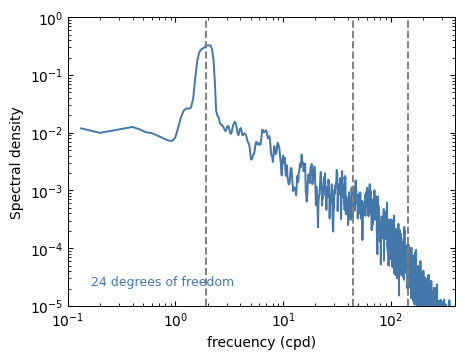

In [50]:
plot_spectrum(p1temp43_freqs[1:], p1temp43_psd[1:], p1temp43_dof, 'cpd', xlim=(1e-1, 4e2), ylim=(1e-5, 1e0), 
              vlines=[M2_cpd, 1/10*60*24, 1/32*60*24])

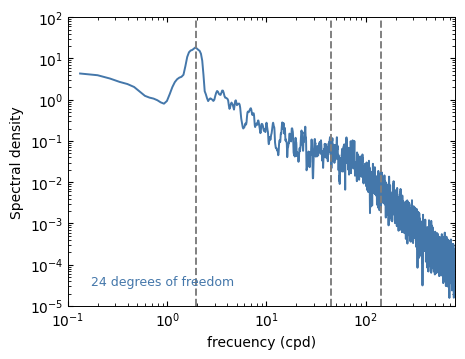

In [41]:
plot_spectrum(p1D_freqs[1:], p1D_psd[1:], p1D_dof, 'cpd', xlim=(1e-1, 8e2), ylim=(1e-5, 1e2), 
              vlines=[M2_cpd, 1/10*60*24, 1/32*60*24])

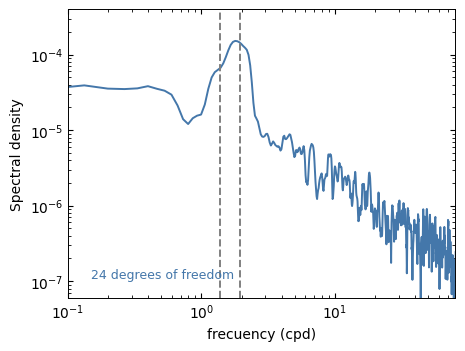

In [18]:
plot_spectrum(p1G_freqs, p1G_psd, p1G_dof, 'cpd', xlim=(1e-1, 8e1), ylim=(6e-8, 4e-4), 
              vlines=[M2_cpd, coriolis_freq_cpd])

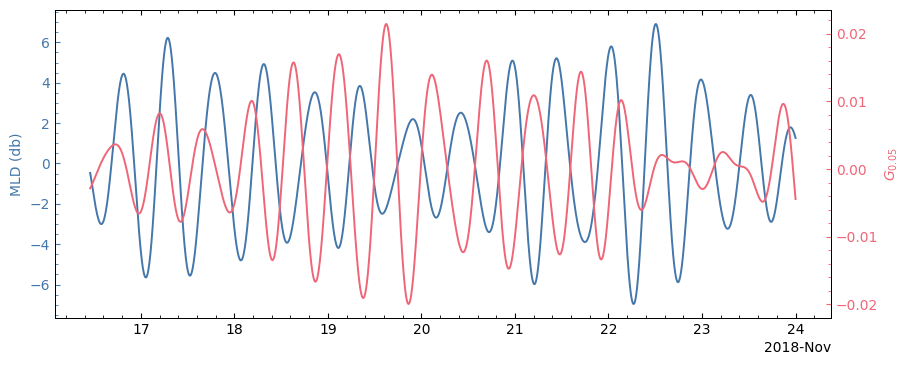

In [9]:
plot_D1_and_G005(D1_bandpass_M2, G005_bandpass_M2, period=period_1)

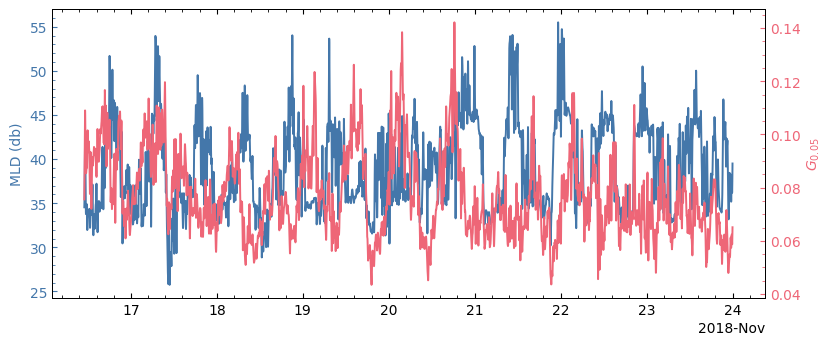

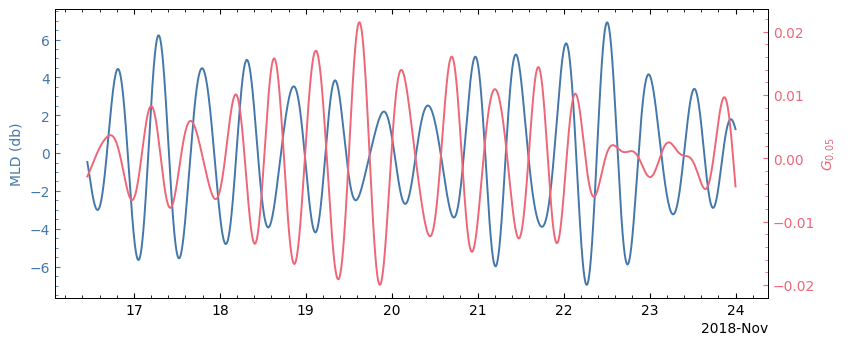

In [19]:
plot_D1_and_G005(D1_filt1024, G005_filt1024, period=period_1)
plot_D1_and_G005(D1_bandpass_M2, G005_bandpass_M2, period=period_1)

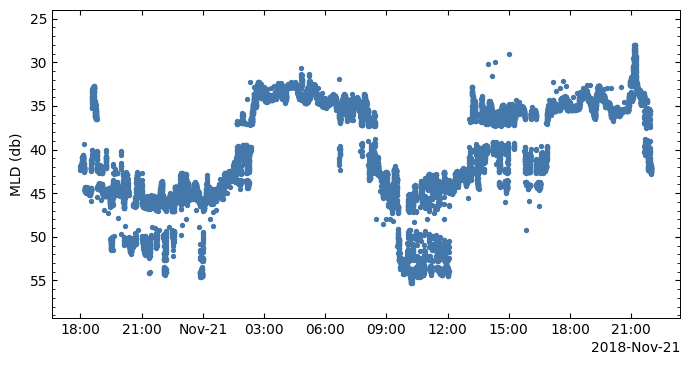

In [55]:
plot_fit_variable(fit_chain, 'D1', period=[datetime(2018, 11, 20, 18), datetime(2018, 11, 21, 22)])

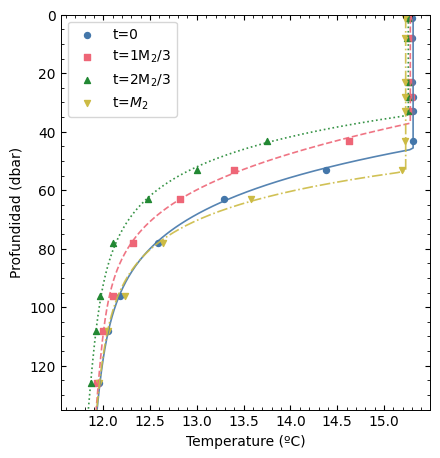

In [42]:
ref_date = datetime(2018, 11, 20, 21, 32, 10)
i_dates = [ref_date + timedelta(hours=i*12.42/3) + timedelta(seconds=i*1) for i in range(4)]
#i_dates = [ref_date + timedelta(hours=i*12.4/4) for i in range(4)]

plot_multiple_profiles_ax(fit_chain, data_chain, i_dates)

[  4.15555556  17.29861111  31.45833333  43.39861111  56.5125
  67.80138889  81.64722222  93.01666667 104.12083333 115.01111111
 128.54861111 151.18888889]
24.27638888888889
31.458333333333332


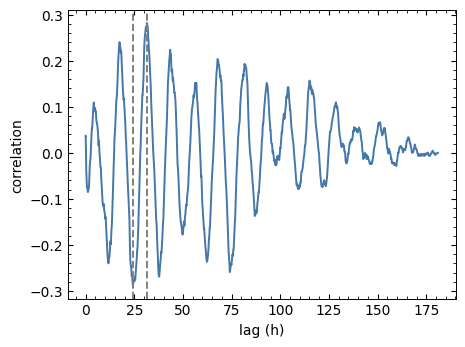

In [27]:
lag_correlation(D1_filt1024, G005_filt1024, period=period_1)

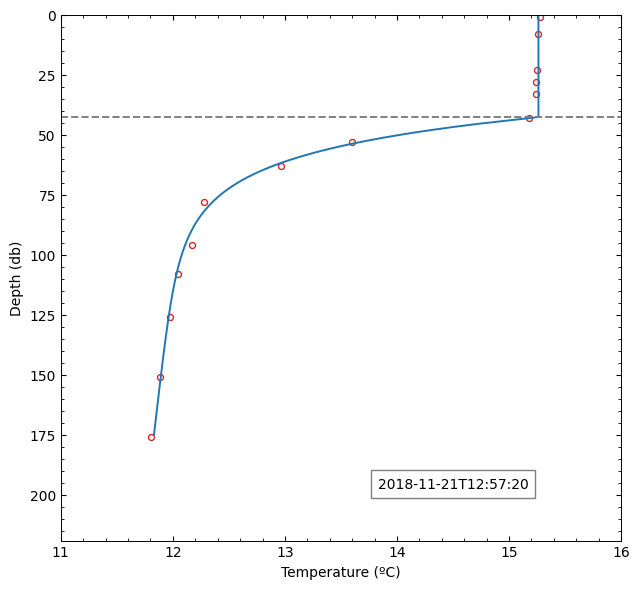

In [43]:
animate_profile_evolution(fit_chain, data_chain, 'period_1_precise.mp4', 
                          period=[ref_date - timedelta(hours=-3), ref_date + timedelta(hours=15.42)], num_plots=600)

In [45]:
display_video('period_1_tides.mp4')

In [46]:
display_video('period_1_precise.mp4')

## Period_3

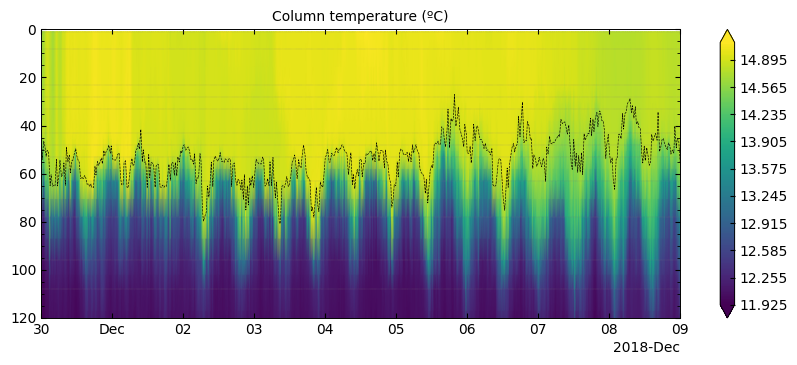

In [33]:
plot_column_temperature(data_chain, fit_chain, period=period_2, ylims=[120, 0])

In [34]:
p2D_freqs, p2D_psd, p2D_dof = multitapping_spectrum(D1_[date_2:date_3].to_numpy(), 5/60/60/24, 3)
p2G_freqs, p2G_psd, p2G_dof = multitapping_spectrum(G005_[date_2:date_3].to_numpy(), 5/60/60/24, 3)

DPSS using interpolation 155521 100000
DPSS using interpolation 155521 100000


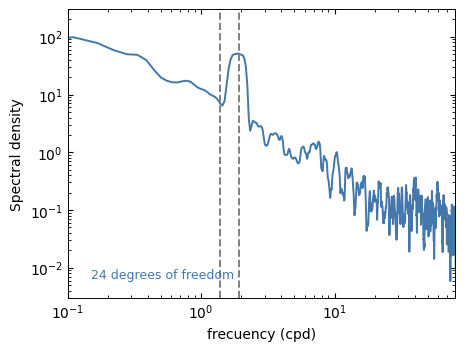

In [35]:
plot_spectrum(p2D_freqs, p2D_psd, p2D_dof, 'cpd', xlim=(1e-1, 8e1), ylim=(3e-3, 3e2), 
              vlines=[M2_cpd, coriolis_freq_cpd])

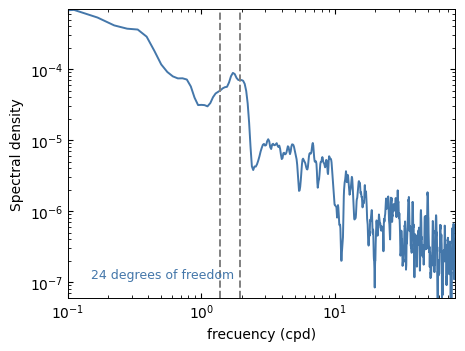

In [36]:
plot_spectrum(p2G_freqs, p2G_psd, p2G_dof, 'cpd', xlim=(1e-1, 8e1), ylim=(6e-8, 7e-4), 
              vlines=[M2_cpd, coriolis_freq_cpd])

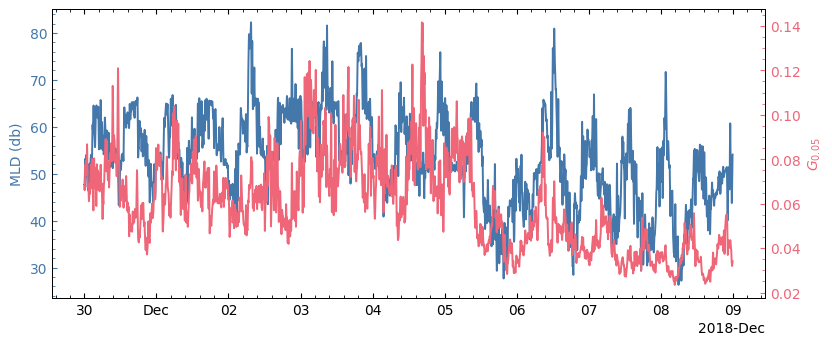

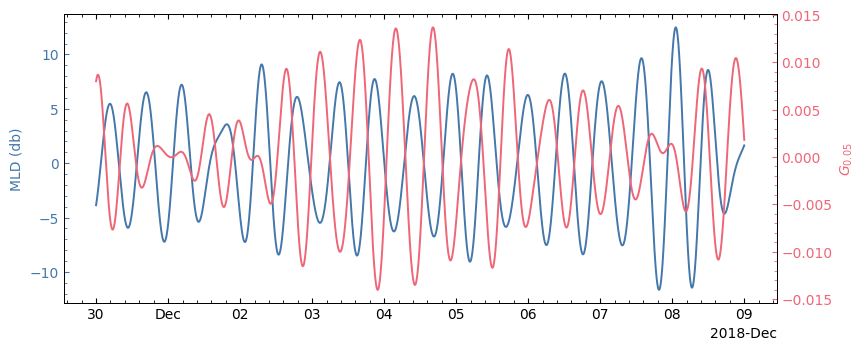

In [28]:
plot_D1_and_G005(D1_filt1024, G005_filt1024, period=period_2)
plot_D1_and_G005(D1_bandpass_M2, G005_bandpass_M2, period=period_2)

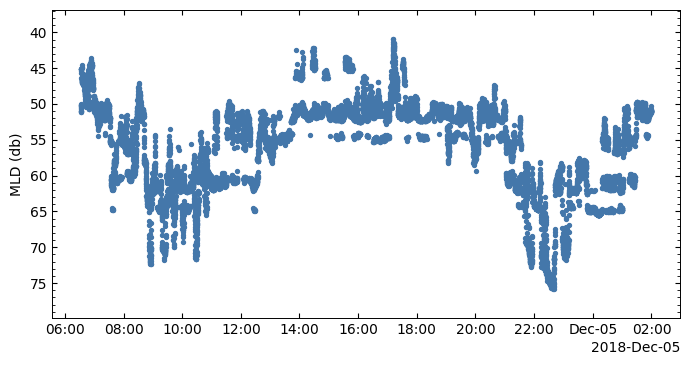

In [29]:
plot_fit_variable(fit_chain, 'D1', period=[datetime(2018, 12, 4, 6, 32, 10), datetime(2018, 12, 5, 2)])

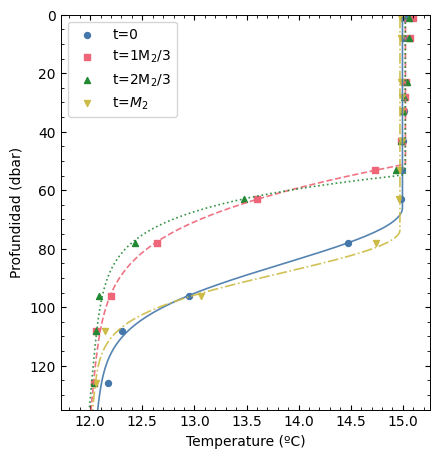

In [30]:
#ref_date = datetime(2018, 12, 3, 20, 4, 10)
ref_date = datetime(2018, 12 ,4, 9, 59, 40)
i_dates = [ref_date + timedelta(hours=i*12.42/3) + timedelta(seconds=i*1) for i in range(4)]
plot_multiple_profiles_ax(fit_chain, data_chain, i_dates)

[  5.74166667  18.31388889  30.68888889  43.40833333  55.7125
  68.27361111  81.00833333  93.15138889 105.64166667 118.15972222
 129.99444444 143.69166667 156.15555556 169.02361111 182.09722222
 192.89722222]
24.43472222222222
18.313888888888886


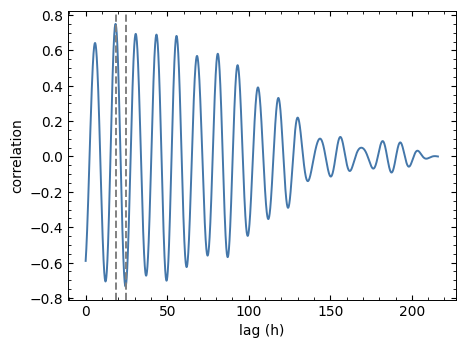

In [31]:
lag_correlation(D1_dn, G005_dn, period=period_2)

In [26]:
display_video('period_2_tides.mp4')

In [32]:
display_video('period_2_precise.mp4')

## Period_3

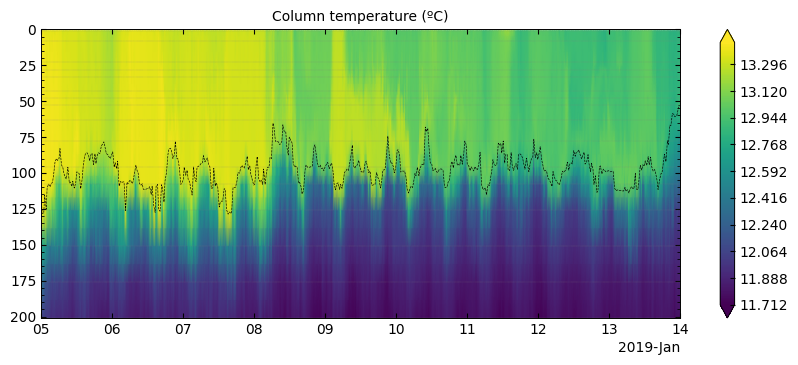

In [24]:
plot_column_temperature(data_chain, fit_chain, period=period_3)


In [25]:
p3D_freqs, p3D_psd, p3D_dof = multitapping_spectrum(D1_[date_4:date_5].to_numpy(), 5/60/60/24, 3)
p3G_freqs, p3G_psd, p3G_dof = multitapping_spectrum(G005_[date_4:date_5].to_numpy(), 5/60/60/24, 3)

DPSS using interpolation 155521 100000
DPSS using interpolation 155521 100000


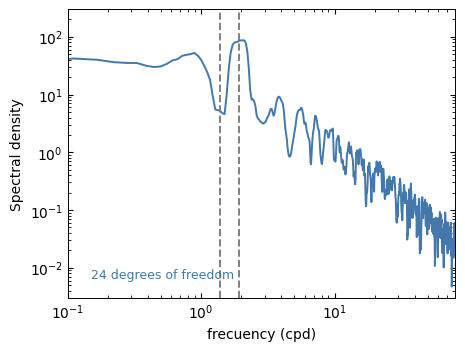

In [26]:
plot_spectrum(p3D_freqs, p3D_psd, p3D_dof, 'cpd', xlim=(1e-1, 8e1), ylim=(3e-3, 3e2), 
              vlines=[M2_cpd, coriolis_freq_cpd])

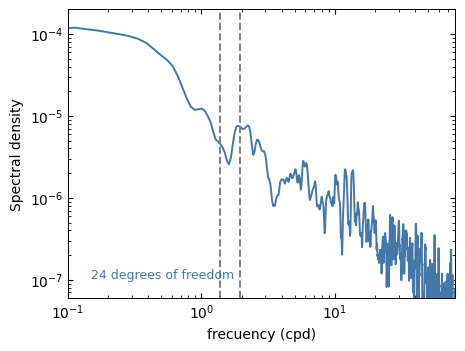

In [66]:
plot_spectrum(p3G_freqs, p3G_psd, p3G_dof, 'cpd', xlim=(1e-1, 8e1), ylim=(6e-8, 2e-4), 
              vlines=[M2_cpd, coriolis_freq_cpd])

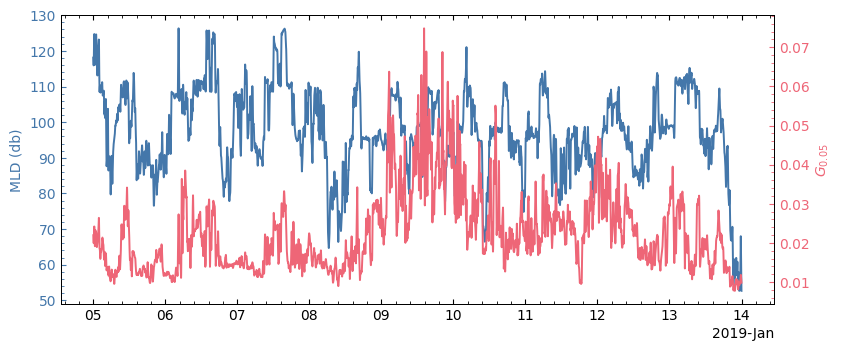

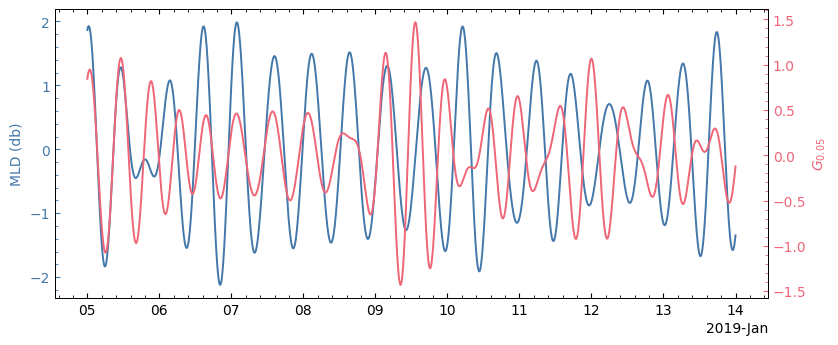

In [67]:
plot_D1_and_G005(D1_filt1024, G005_filt1024, period=period_3)
plot_D1_and_G005(D1_dn, G005_dn, period=period_3)

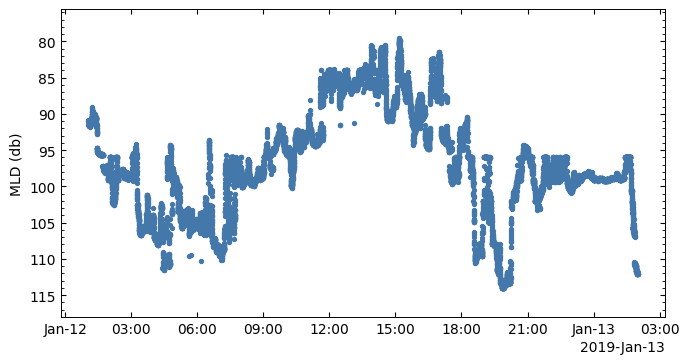

In [37]:
plot_fit_variable(fit_chain, 'D1', period=[datetime(2019, 1, 12, 1, 3, 10), datetime(2019, 1, 13, 2)])

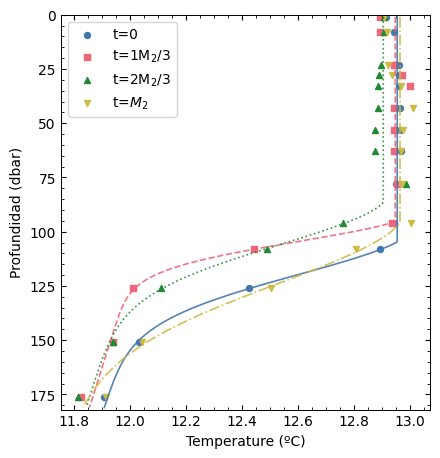

In [38]:
ref_date = datetime(2019, 1, 12, 5, 55, 40)
i_dates = [ref_date + timedelta(hours=i*12.42/3) + timedelta(seconds=i*1) for i in range(4)]
plot_multiple_profiles_ax(fit_chain, data_chain, i_dates, ylim=(182, 0))

[  1.98194444  16.25416667  27.59305556  39.82777778  51.56944444
  63.98055556  76.19305556  88.34305556 100.30416667 112.28194444
 124.86944444 137.37916667 148.8625     160.11388889 176.89861111
 187.6        198.23194444 208.55416667]
21.829166666666666
27.593055555555555


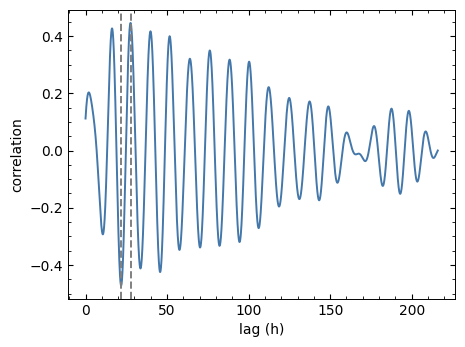

In [39]:
lag_correlation(D1_dn, G005_dn, period=period_3)

In [51]:
low = period_to_freq(13.5, 'h')
high = period_to_freq(11.5, 'h')
D1_bandpass_M2 = bandpass_filter(fit_chain.D1, data_chain.date, 1/5, low, high)
G005_bandpass_M2 = bandpass_filter(G005.x, data_chain.date, 1/5, low, high)

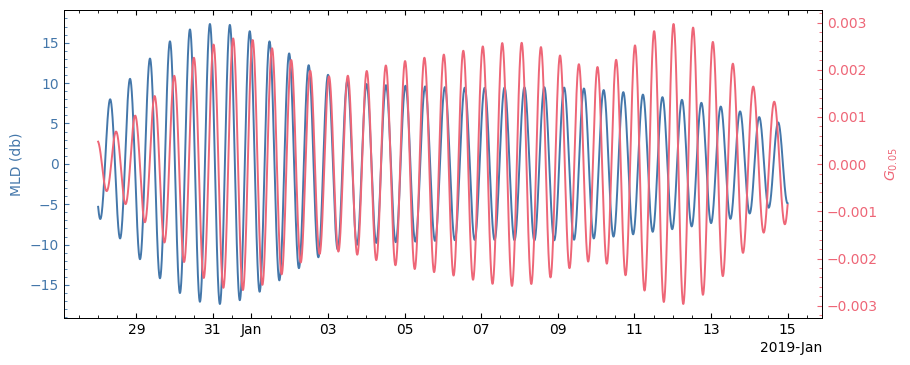

In [58]:
plot_D1_and_G005(D1_bandpass_M2, G005_bandpass_M2, period=[datetime(2018, 12, 28), datetime(2019, 1, 15)])

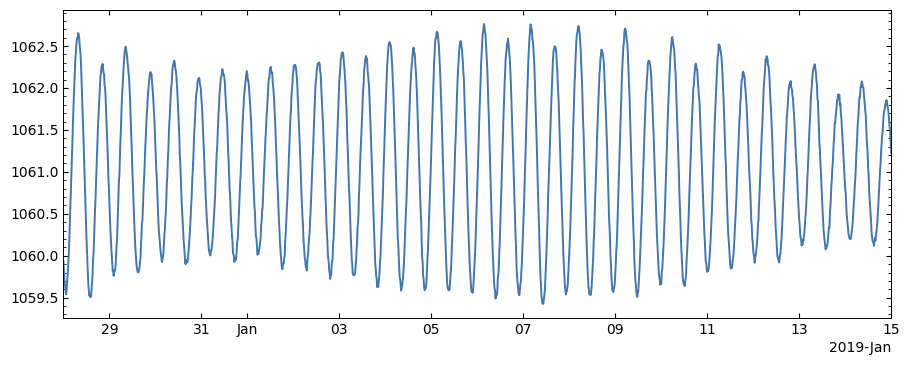

In [60]:
plot_arbitrary_variable(bot_pres.pres, period=[datetime(2018, 12, 28), datetime(2019, 1, 15)], kind='plot')

In [61]:
from scipy.signal import hilbert

In [96]:
envelope = hilbert(bot_pres.pres.to_numpy() - bot_pres.pres.mean())

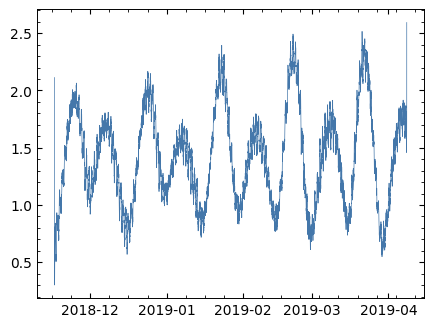

In [97]:
plt.plot(bot_pres.index, np.abs(envelope), lw=0.5)


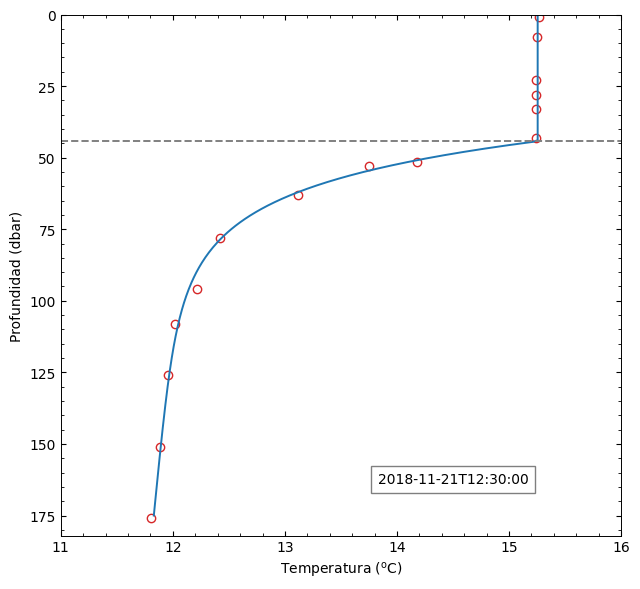

In [13]:
animate_profile_evolution(fit_chain, data_chain, 'internal_tide_and_soliton_period1_.mp4',
                         period=[datetime(2018, 11, 20, 23, 30), datetime(2018, 11, 21, 12, 30)], num_plots=650)